# Credit Card Fraud Detection

### 필요한 Library Import & 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time
from tensorflow import keras
import os
import tempfile
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifier. 분류기들
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

import warnings
warnings.filterwarnings("ignore") # warning 제거

## 데이터 불러오기, 살펴보기

In [2]:
# 데이터 불러오기
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,LOT,CycleTime,uvlamp_cycletime,InjTime,RecoveryT,Cushion,InjSpeed,InjPress,TotalShot,ThroatTemp,...,CTACTIONTEMPP,CTACTIONTEMPS,CTPRESSURE,CTOUTTEMP,OUTTEMP,OUTHUMIDITY,MI_TEST_RESULT,PAMCALE_RESULT,TIME_STAMP,RESULT
0,4E922-05020HDD20220418075712,57.9,379,0.0,19.33,25.8,29.3,953,28944,40.4,...,24.1,24,1.9,22.9,14.9,48.3,17.2,0,2022-04-18 07:57:12,GOOD
1,4E922-05020HDD20220418075811,58.0,379,0.0,19.43,25.7,29.3,958,28945,40.5,...,24.0,24,1.9,22.9,15.0,48.2,17.2,0,2022-04-18 07:58:11,GOOD
2,4E922-05020HDD20220418075908,58.0,379,0.0,19.23,25.8,29.3,959,28946,40.6,...,24.2,24,1.9,22.5,15.1,47.7,17.2,0,2022-04-18 07:59:08,GOOD
3,4E922-05020HDD20220418080007,58.0,379,0.0,19.38,25.8,29.3,954,28947,40.8,...,24.1,24,2.0,22.3,15.4,47.2,17.2,0,2022-04-18 08:00:07,GOOD
4,4E922-05020HDD20220418080105,58.0,379,0.0,19.39,25.8,29.3,951,28948,40.8,...,24.1,24,1.9,22.2,15.5,47.4,17.2,0,2022-04-18 08:01:05,GOOD


In [4]:
test.head()

,LOT,CycleTime,uvlamp_cycletime,InjTime,RecoveryT,Cushion,InjSpeed,InjPress,TotalShot,ThroatTemp,...,CTACTIONTEMPP,CTACTIONTEMPS,CTPRESSURE,CTOUTTEMP,OUTTEMP,OUTHUMIDITY,MI_TEST_RESULT,PAMCALE_RESULT,TIME_STAMP,RESULT
0,M7925-11000HDD20220526014142,59.7,871,11.05,12.45,16.6,19.3,1463,369705,50.2,...,25.5,24,1.8,23.5,26.3,37.6,18,0,2022-05-26 01:41:42,GOOD
1,M7925-11000HDD20220526014241,59.3,871,11.06,12.50,16.6,19.3,1465,369706,50.3,...,25.5,24,1.8,23.5,26.1,37.9,18,0,2022-05-26 01:42:41,GOOD
2,M7925-11000HDD20220526014341,59.7,871,11.06,12.28,16.6,19.3,1463,369707,50.3,...,25.5,24,1.8,23.4,26.0,38.3,18,0,2022-05-26 01:43:41,GOOD
3,M7925-11000HDD20220526014440,59.3,871,11.08,12.41,16.6,19.3,1465,369708,50.3,...,25.5,24,1.9,23.6,25.9,38.6,18,0,2022-05-26 01:44:40,GOOD
4,M7925-11000HDD20220526014540,59.6,871,11.08,12.24,16.6,19.3,1463,369709,50.3,...,25.6,24,1.8,23.6,25.9,38.6,18,0,2022-05-26 01:45:40,GOOD


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7720 entries, 0 to 7719
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOT               7720 non-null   object 
 1   CycleTime         7720 non-null   float64
 2   uvlamp_cycletime  7720 non-null   int64  
 3   InjTime           7720 non-null   float64
 4   RecoveryT         7720 non-null   float64
 5   Cushion           7720 non-null   float64
 6   InjSpeed          7720 non-null   float64
 7   InjPress          7720 non-null   int64  
 8   TotalShot         7720 non-null   int64  
 9   ThroatTemp        7720 non-null   float64
 10  HPTransPrs        7720 non-null   float64
 11  HPTransPos        7720 non-null   float64
 12  Oily              7720 non-null   float64
 13  Moisture          7720 non-null   float64
 14  Ebi               7720 non-null   float64
 15  Eai               7720 non-null   float64
 16  INPUT             7720 non-null   int64  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LOT               1930 non-null   object 
 1   CycleTime         1930 non-null   float64
 2   uvlamp_cycletime  1930 non-null   int64  
 3   InjTime           1930 non-null   float64
 4   RecoveryT         1930 non-null   float64
 5   Cushion           1930 non-null   float64
 6   InjSpeed          1930 non-null   float64
 7   InjPress          1930 non-null   int64  
 8   TotalShot         1930 non-null   int64  
 9   ThroatTemp        1930 non-null   float64
 10  HPTransPrs        1930 non-null   float64
 11  HPTransPos        1930 non-null   float64
 12  Oily              1930 non-null   float64
 13  Moisture          1930 non-null   float64
 14  Ebi               1930 non-null   float64
 15  Eai               1930 non-null   float64
 16  INPUT             1930 non-null   int64  

In [7]:
train.describe()

,CycleTime,uvlamp_cycletime,InjTime,RecoveryT,Cushion,InjSpeed,InjPress,TotalShot,ThroatTemp,HPTransPrs,...,WH4OUTTEMP,WH4INFLUX,CTACTIONTEMPP,CTACTIONTEMPS,CTPRESSURE,CTOUTTEMP,OUTTEMP,OUTHUMIDITY,MI_TEST_RESULT,PAMCALE_RESULT
count,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,...,7720.0,7720.000000,7720.000000,7720.0,7720.000000,7720.000000,7720.000000,7720.000000,7720.000000,7720.0
mean,87.432681,613.097280,1.525556,19.494426,24.893601,26.165039,1044.130311,83303.745855,52.571295,100.927927,...,3100.0,3.088110,23.677539,24.0,1.865855,22.640142,21.917474,36.661788,12.734301,0.0
std,1728.134497,153.285406,3.805546,2.528673,3.273104,2.706982,176.499125,113625.994310,5.847608,17.591904,...,0.0,1.876951,0.406895,0.0,0.066094,0.463969,5.049206,14.155364,7.997059,0.0
min,57.800000,379.000000,0.000000,11.580000,16.500000,19.300000,902.000000,28944.000000,40.400000,87.300000,...,3100.0,0.000000,22.900000,24.0,1.600000,21.400000,12.700000,15.800000,0.000000,0.0
25%,58.500000,395.000000,0.000000,20.200000,26.000000,27.000000,947.000000,29919.750000,49.700000,91.475000,...,3100.0,3.150000,23.600000,24.0,1.800000,22.300000,18.000000,23.800000,0.000000,0.0
50%,58.900000,645.000000,0.000000,20.520000,26.300000,27.000000,998.000000,39807.500000,51.300000,96.300000,...,3100.0,3.370000,23.600000,24.0,1.900000,22.900000,22.000000,34.900000,17.280000,0.0
75%,59.000000,661.000000,0.000000,20.670000,26.300000,27.300000,1012.000000,47018.000000,52.400000,97.400000,...,3100.0,3.450000,23.600000,24.0,1.900000,22.900000,26.600000,48.200000,18.000000,0.0
max,107433.200000,882.000000,11.470000,23.820000,26.500000,29.300000,1488.000000,369704.000000,69.000000,145.100000,...,3100.0,11.060000,26.200000,24.0,2.000000,24.000000,31.900000,73.100000,18.000000,0.0


In [8]:
train.describe(include = ['O']) # 범주형 데이터 describe

,LOT,TIME_STAMP,RESULT
count,7720,7720,7720
unique,7720,4462,2
top,4E922-05020HDD20220418075712,2022-05-05 02:25:32,GOOD
freq,1,3,7598


In [9]:
test.describe(include = ['O'])

,LOT,TIME_STAMP,RESULT
count,1930,1930,1930
unique,1930,1550,2
top,M7925-11000HDD20220526014142,2022-05-26 01:41:42,GOOD
freq,1,2,1835


In [10]:
test['RESULT'].unique()

array(['GOOD', 'NOT_GOOD'], dtype=object)

Text(0, 0.5, 'Frequency')

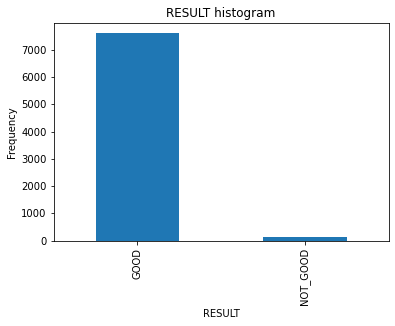

In [11]:
count_RESULT = pd.value_counts(train['RESULT'], sort = True).sort_index()
count_RESULT.plot(kind = 'bar')
plt.title("RESULT histogram")
plt.xlabel("RESULT")
plt.ylabel("Frequency")

상관 행렬
plt.figure(figsize = (8,8))
sns.heatmap(train.corr(), cmap= 'Spectral', annot=True, square=True)

column이 너무 많아 EDA(탐색적데이터분석) & feature engineering 은 불가하다고 판단. <br>
필요없는 칼럼 drop 후 모델링 진행

In [12]:
# Time Stamp, 'LOT' 은 불필요하다고 판단되어 drop
train = train.drop(['TIME_STAMP'], axis=1)
train = train.drop(['LOT'], axis=1)
test = test.drop(['TIME_STAMP'], axis = 1)
test = test.drop(['LOT'], axis = 1)
combine = [train, test] # 한 번에 처리를 위해 combine.

In [13]:
print(train.shape, test.shape)

(7720, 98) (1930, 98)


# Modeling

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [15]:
vc = train['RESULT'].value_counts().to_frame().reset_index()
vc['percent'] = vc["RESULT"].apply(lambda x : round(100*float(x) / len(train), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,RESULT,percent
0,GOOD,7598,98.42
1,NOT_GOOD,122,1.58


- NOT_GOOD 의 비율이 1.58% 로 적은 비율을 차지하고 있다.

In [16]:
for dataset in combine :
    dataset['RESULT'] = dataset['RESULT'].map( {'GOOD' : 1, 'NOT_GOOD' : 0}).astype(int)
    # GOOD, NOT_GOOD 을 0,1로 바꾸어주기.
    
train.head()

,CycleTime,uvlamp_cycletime,InjTime,RecoveryT,Cushion,InjSpeed,InjPress,TotalShot,ThroatTemp,HPTransPrs,...,WH4INFLUX,CTACTIONTEMPP,CTACTIONTEMPS,CTPRESSURE,CTOUTTEMP,OUTTEMP,OUTHUMIDITY,MI_TEST_RESULT,PAMCALE_RESULT,RESULT
0,57.9,379,0.0,19.33,25.8,29.3,953,28944,40.4,91.9,...,3.48,24.1,24,1.9,22.9,14.9,48.3,17.2,0,1
1,58.0,379,0.0,19.43,25.7,29.3,958,28945,40.5,92.6,...,3.48,24.0,24,1.9,22.9,15.0,48.2,17.2,0,1
2,58.0,379,0.0,19.23,25.8,29.3,959,28946,40.6,92.5,...,3.46,24.2,24,1.9,22.5,15.1,47.7,17.2,0,1
3,58.0,379,0.0,19.38,25.8,29.3,954,28947,40.8,92.1,...,3.48,24.1,24,2.0,22.3,15.4,47.2,17.2,0,1
4,58.0,379,0.0,19.39,25.8,29.3,951,28948,40.8,91.6,...,3.47,24.1,24,1.9,22.2,15.5,47.4,17.2,0,1


In [17]:
train = pd.DataFrame(train)

In [18]:
test

,CycleTime,uvlamp_cycletime,InjTime,RecoveryT,Cushion,InjSpeed,InjPress,TotalShot,ThroatTemp,HPTransPrs,...,WH4INFLUX,CTACTIONTEMPP,CTACTIONTEMPS,CTPRESSURE,CTOUTTEMP,OUTTEMP,OUTHUMIDITY,MI_TEST_RESULT,PAMCALE_RESULT,RESULT
0,59.7,871,11.05,12.45,16.6,19.3,1463,369705,50.2,142.8,...,0.00,25.5,24,1.8,23.5,26.3,37.6,18,0,1
1,59.3,871,11.06,12.50,16.6,19.3,1465,369706,50.3,142.6,...,0.00,25.5,24,1.8,23.5,26.1,37.9,18,0,1
2,59.7,871,11.06,12.28,16.6,19.3,1463,369707,50.3,142.7,...,0.00,25.5,24,1.8,23.4,26.0,38.3,18,0,1
3,59.3,871,11.08,12.41,16.6,19.3,1465,369708,50.3,142.9,...,0.00,25.5,24,1.9,23.6,25.9,38.6,18,0,1
4,59.6,871,11.08,12.24,16.6,19.3,1463,369709,50.3,142.6,...,0.00,25.6,24,1.8,23.6,25.9,38.6,18,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,61.8,691,0.00,10.07,12.0,38.3,1224,41838,48.0,89.8,...,10.90,23.6,24,1.9,22.9,29.2,31.3,18,0,1
1926,61.2,691,0.00,9.98,11.8,38.0,1217,41839,48.0,90.0,...,10.92,23.6,24,1.9,22.9,29.1,31.3,18,0,1
1927,61.7,691,0.00,10.02,12.0,38.3,1227,41840,48.0,89.0,...,10.92,23.6,24,1.9,22.9,29.0,31.7,18,0,1
1928,61.2,691,0.00,9.98,12.0,38.3,1225,41841,48.0,89.2,...,10.95,23.6,24,1.9,22.9,29.0,31.6,18,0,1


In [19]:
## train, text 데이터들 분리
x_train = train.loc[:, 'CycleTime':'PAMCALE_RESULT']
y_train = train['RESULT'] # 예측할 변수 분리
x_test = test.loc[:, 'CycleTime':'PAMCALE_RESULT']
y_test = test['RESULT'] # 검증 데이터

In [20]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7720, 97) (7720,) (1930, 97) (1930,)


### Logistic Reggression

<hr>

- 독립변수의 선형 결합을 이용하여 개별 관측치가 어느 집단에 속하는 지에 대한 확률을 계산.
- 승산비를 이용하여 로지스틱 함수를 얻어 분석에 이용하는 것이 특징이다.

In [21]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0) # model define
model.fit(x_train, y_train) # model fitting

y_pred = model.predict(x_test) # test 데이터 학습

# accuracy
lr_score = model.score(x_test, y_test) 
lr_score

0.5316062176165803

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.05      0.45      0.09        95
           1       0.95      0.54      0.69      1835

    accuracy                           0.53      1930
   macro avg       0.50      0.49      0.39      1930
weighted avg       0.91      0.53      0.66      1930



Text(0.5, 1.0, '<< LogisticRegression >>')

<Figure size 1500x1500 with 0 Axes>

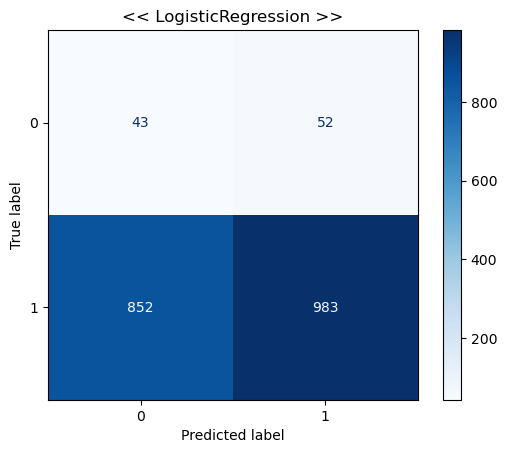

In [23]:
# Confusion Matrix 로 시각화
plt.style.use('default')
plt.figure(figsize=(15, 15))
plot_confusion_matrix(model, x_test , y_test , cmap='Blues')
plt.title("<< LogisticRegression >>")

### Gaussian Naive Bayes
<hr>
- 베이즈 정리를 이용하여 분류하는 모델

In [24]:
## Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() # model define
model.fit(x_train, y_train) # model fitting

y_pred = model.predict(x_test) # inference

# accuracy
nb_score = model.score(x_test, y_test)
nb_score

0.9507772020725389

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.95      1.00      0.97      1835

    accuracy                           0.95      1930
   macro avg       0.48      0.50      0.49      1930
weighted avg       0.90      0.95      0.93      1930



Text(0.5, 1.0, '<< Gaussian NaiveBayes >>')

<Figure size 1500x1500 with 0 Axes>

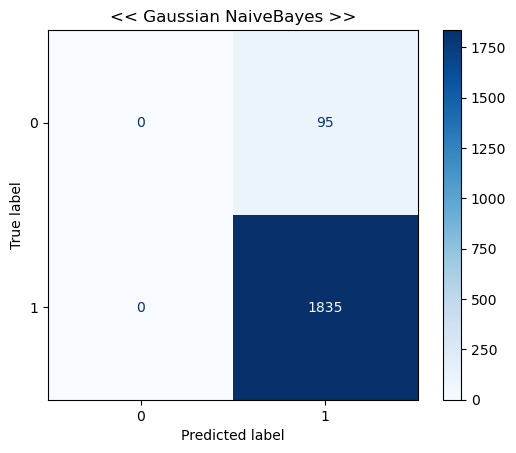

In [26]:
plt.style.use('default')
plt.figure(figsize=(15, 15))
plot_confusion_matrix(model, x_test , y_test , cmap='Blues')
plt.title("<< Gaussian NaiveBayes >>")

### KNN
<hr>

- K-최근접이웃법이라고 한다.
- 입력과 결과가 있는 데이터들이 주어지고, 여기서 새로운 입력에 대한 결과를 추정할 때 결과를 모델이 알고 있는 최근접한 k개의 데이터에 대한 결과 정보를 이용해서 분류하는 분류기

In [27]:
## K-nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3) # define
model.fit(x_train, y_train) # fitting

y_pred = model.predict(x_test) # inference

# accuracy
knn_score = model.score(x_test, y_test)
knn_score

0.9507772020725389

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.95      1.00      0.97      1835

    accuracy                           0.95      1930
   macro avg       0.48      0.50      0.49      1930
weighted avg       0.90      0.95      0.93      1930



Text(0.5, 1.0, '<< KNeighborsClassifier >>')

<Figure size 1500x1500 with 0 Axes>

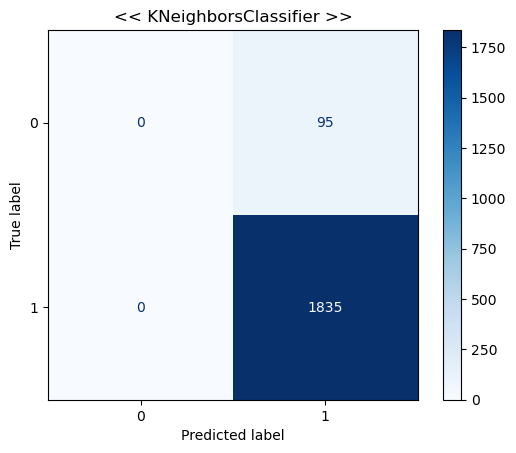

In [29]:
plt.style.use('default')
plt.figure(figsize=(15, 15))
plot_confusion_matrix(model, x_test , y_test , cmap='Blues')
plt.title("<< KNeighborsClassifier >>")

### Decision Tree
<hr>

- 의사결정나무
- 데이터들이 가진 속성들로부터 분할 기준 속성을 판별하고 이 속성에 따라 나무 형태로 모델링하는 모델

In [30]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)
model.fit(x_train, y_train)

# inference
y_pred = model.predict(x_test)

# accuracy
dt_score = model.score(x_test, y_test)
dt_score

0.9507772020725389

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.95      1.00      0.97      1835

    accuracy                           0.95      1930
   macro avg       0.48      0.50      0.49      1930
weighted avg       0.90      0.95      0.93      1930



Text(0.5, 1.0, '<< DecisionTreeClassifier >>')

<Figure size 1500x1500 with 0 Axes>

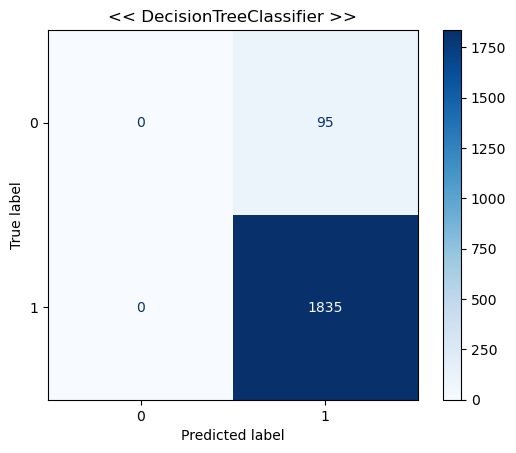

In [32]:
plt.style.use('default')
plt.figure(figsize=(15, 15))
plot_confusion_matrix(model, x_test , y_test , cmap='Blues')
plt.title("<< DecisionTreeClassifier >>")

### Random Forest
<hr>

- Decision Tree 를 앙상블시킨 모델.
- Decision Tree 를 통해 학습기를 생성한 후 이를 선형 결합하여 최종 학습기를 만든다.

In [33]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, max_depth=3) # define
model.fit(x_train, y_train) # fitting

# inference
y_pred = model.predict(x_test)

# accuracy
rf_score = model.score(x_test, y_test)
rf_score

0.9507772020725389

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.95      1.00      0.97      1835

    accuracy                           0.95      1930
   macro avg       0.48      0.50      0.49      1930
weighted avg       0.90      0.95      0.93      1930



Text(0.5, 1.0, '<< RandomForestClassifier >>')

<Figure size 1500x1500 with 0 Axes>

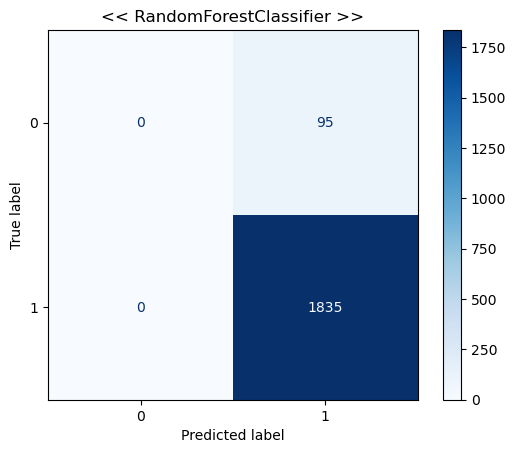

In [35]:
plt.style.use('default')
plt.figure(figsize=(15, 15))
plot_confusion_matrix(model, x_test , y_test , cmap='Blues')
plt.title("<< RandomForestClassifier >>")

### Support Vector Machine
<hr>

- 퍼셉트론 기반의 모형에 가장 안정적인 판별 경계선을 찾기 위한 제한 조건을 추가한 모형

In [36]:
## Support Vector Machine
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma='auto') # define
model.fit(x_train, y_train) # fitting

y_pred = model.predict(x_test)

# accuracy
svm_score = model.score(x_test, y_test)
svm_score

0.9507772020725389

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.95      1.00      0.97      1835

    accuracy                           0.95      1930
   macro avg       0.48      0.50      0.49      1930
weighted avg       0.90      0.95      0.93      1930



Text(0.5, 1.0, '<< SVM >>')

<Figure size 1500x1500 with 0 Axes>

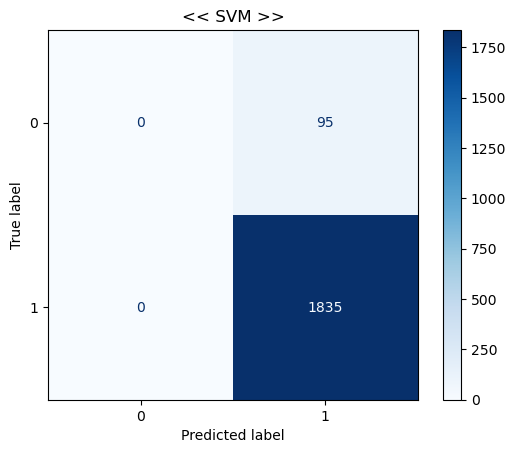

In [38]:
plt.style.use('default')
plt.figure(figsize=(15, 15))
plot_confusion_matrix(model, x_test , y_test , cmap='Blues')
plt.title("<< SVM >>")

### XGBoost
<hr>

- Boosting 기법을 활용한 알고리즘
- Gradient Boosting 에 병렬학습기능이 지원되도록 한 알고리즘

In [39]:
## XGBoost
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier(n_estimators=400)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# acuracy
xgb_score = model.score(x_test, y_test)
xgb_score

0.9471502590673575

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.95      1.00      0.97      1835

    accuracy                           0.95      1930
   macro avg       0.48      0.50      0.49      1930
weighted avg       0.90      0.95      0.92      1930



Text(0.5, 1.0, '<< XGBoosting >>')

<Figure size 1500x1500 with 0 Axes>

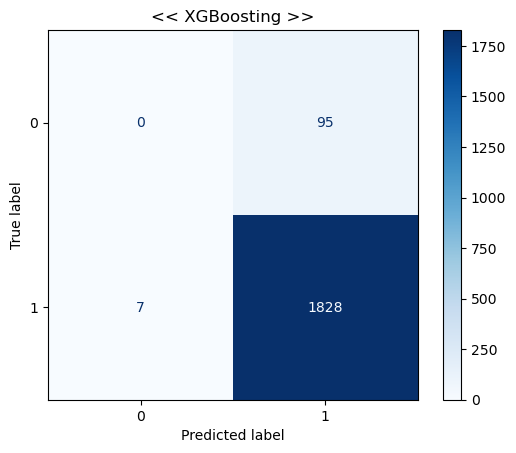

In [41]:
plt.style.use('default')
plt.figure(figsize=(15, 15))
plot_confusion_matrix(model, x_test , y_test , cmap='Blues')
plt.title("<< XGBoosting >>")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

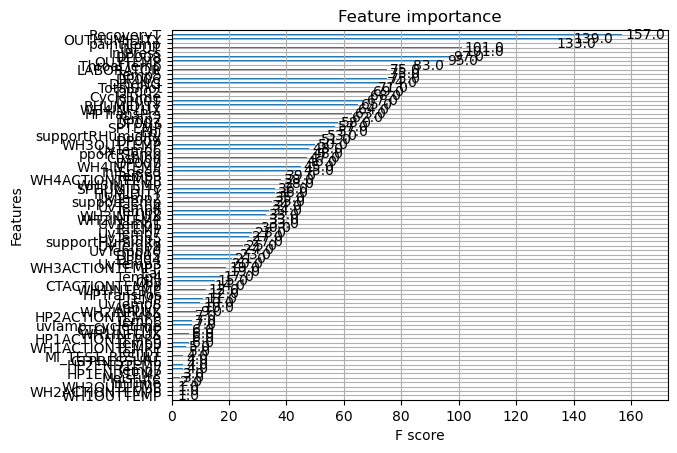

In [42]:
# 변수 중요도 시각화 
plot_importance(model)

### Tensorflow 사용 : ANN

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
m = Sequential()
m.add(Dense(8, input_dim = 97, activation='relu'))
m.add(Dense(2, activation='softmax'))

m.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [45]:
hist = m.fit(x_train, y_train,
             epochs=50,
             validation_split=0.2,
             verbose=0)

In [46]:
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,39.154240,0.970369,40.623295,0.99158
1,4.790048,0.959521,24.968534,0.99158
2,3.822643,0.959845,20.809805,0.99158
3,3.237286,0.963245,11.130135,0.99158
4,3.336998,0.964864,8.857489,0.99158
5,5.252919,0.963892,17.914963,0.99158
6,3.384763,0.968912,9.051626,0.99158
7,1.846600,0.963731,15.582590,0.99158
8,1.224772,0.967293,14.854489,0.99158
9,1.719550,0.968750,7.538169,0.99158


In [47]:
y_pred = m.predict(x_test)

61/61 [==============================] - 0s 2ms/step


In [48]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 784       
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 모델평가
m.evaluate(x_test, y_test)

61/61 [==============================] - 0s 3ms/step - loss: 3.8738 - accuracy: 0.9508


[3.873809337615967, 0.9507771730422974]

In [50]:
from tensorflow.keras.utils import to_categorical

y_test_onehot = to_categorical(y_test)

In [51]:
print(confusion_matrix(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1)))
print(accuracy_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1)))
ann_score = accuracy_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1))

[[   0   95]
 [   0 1835]]
0.9507772020725389


In [52]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.ylim([0,40])
    plt.xlabel("Epoch")
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

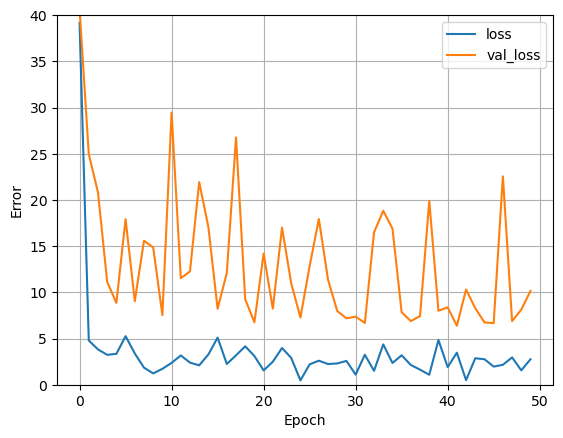

In [54]:
plot_loss(hist)

In [58]:
# 모델 정규화
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization(axis = -1)
normalizer.adapt(np.array(x_train))

normalized_model = Sequential()
normalized_model.add(normalizer)
normalized_model.add(Dense(8, input_dim = 97, activation='relu'))
normalized_model.add(Dense(2, activation='softmax'))

normalized_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 97)               195       
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 8)                 784       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 997
Trainable params: 802
Non-trainable params: 195
_________________________________________________________________


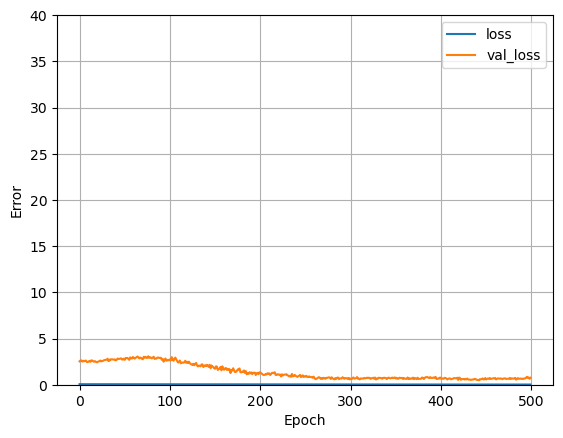

In [61]:
normalized_model.compile(loss = 'sparse_categorical_crossentropy',
                         optimizer = 'adam',
                         metrics = ['accuracy'])

normalized_history = normalized_model.fit(x_train, y_train, epochs = 500,
                                         verbose = 0, validation_split = 0.2)

plot_loss(normalized_history)

### score

In [62]:
models = pd.DataFrame(
    data = [
        ['Logistic Regression', lr_score],
        ['Gaussian Naive Bayes', nb_score],
        ['K-nearest Neighbors', knn_score],
        ['Decision Tree', dt_score],
        ['Random Forest', rf_score],
        ['Support Vector Machine', svm_score],
        ['XGBoost', xgb_score],
        ['ANN', ann_score]
    ],
    columns = ['Model', 'Score']
)

models.set_index('Model', inplace=True)
models.sort_values('Score', ascending=False)

,Score
Model,
Gaussian Naive Bayes,0.950777
K-nearest Neighbors,0.950777
Decision Tree,0.950777
Random Forest,0.950777
Support Vector Machine,0.950777
ANN,0.950777
XGBoost,0.947150
Logistic Regression,0.531606
